In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OneHotEncoder

import warnings
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [358]:
df=pd.read_csv(r"E:\Data Sets\bank-additional\bankData.csv")

In [359]:
df.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Bank details: 
It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

In [360]:
df.shape


(41188, 21)

In [361]:
df.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [362]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [363]:
df.rename(columns={'y':'target'}, inplace=True)
df.target.value_counts()

no     36548
yes     4640
Name: target, dtype: int64

In [364]:
def conversionTarget(answer):
    if answer=='yes':
        return 1
    elif answer=='no':
        return 0
    else:
        return NaN
    
    
df['target']=df['target'].apply(conversionTarget)

In [365]:
df.target.value_counts()

0    36548
1     4640
Name: target, dtype: int64

In [366]:
df.isnull().sum()

#No missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

In [367]:
col=list(df.columns)

for ele in col: 
    print ("Feature Name {}".format(ele))
    print ("Unique Features :{} ".format(len(df[ele].unique())))
    print (df[ele].value_counts(),end="\n \n")

Feature Name age
Unique Features :78 
31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
 
Feature Name job
Unique Features :12 
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemploy

In [368]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


##### From the correlation matrix we can conclude that there are columns that are has low correaltion co-efficient with respect to target, its better to drop them to reduce the dimensionality as well 

In [369]:
df.drop(['campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed','euribor3m'],axis=1,inplace=True)

In [370]:
df.shape

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'previous', 'poutcome',
       'target'],
      dtype='object')

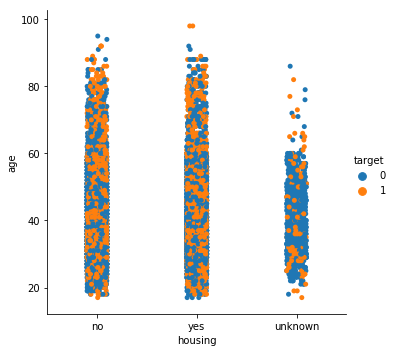

In [371]:
try:
    sns.catplot(data=df,x='housing',y='age',hue='target')
except ValueError:
    pass

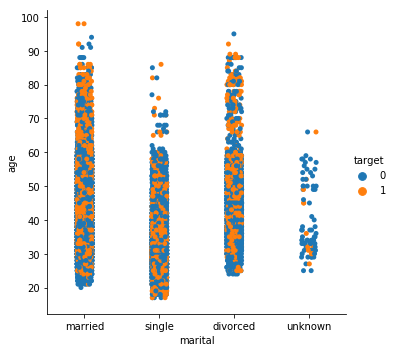

In [372]:
try:
    sns.catplot(data=df,x='marital',y='age',hue='target')
except ValueError:
    pass

### Handling Categorical Variable 

#### Label encoding: Label encoding would have been meant for target variable but we have already done that 

#### One hot encoding would not been feasible as we have multiple columns to covert 

### Looking for ordinal and nominal data to decide the encoding techniques

In [373]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'previous', 'poutcome',
       'target'],
      dtype='object')

In [374]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

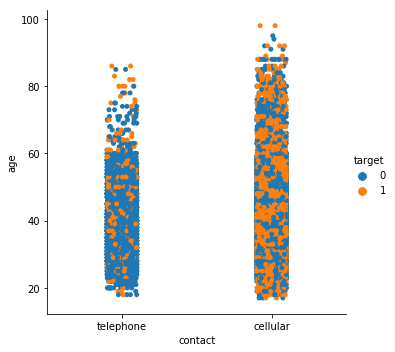

In [375]:
try:
    sns.catplot(data=df,x='contact',y='age',hue='target')
except ValueError:
    pass

#we see a client with telephone has less converstion and a client with cellphone has more conversion


In [376]:

def contactTarget(cellType):
    if cellType=='telephone':
        return 0
    if cellType=='cellular':
        return 1


df['contact']=df['contact'].apply(contactTarget)
df.contact.value_counts()

1    26144
0    15044
Name: contact, dtype: int64

we see the other categorical variable are more granular we can't conclude their impact on our target variable 
so we need to encode them using OneHotEncoding

In [377]:
pd.get_dummies(df.marital).head(2)

,divorced,married,single,unknown
0,0,1,0,0
1,0,1,0,0


In [378]:
df.select_dtypes(include='object').head(5)

,job,marital,education,default,housing,loan,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,may,mon,nonexistent
2,services,married,high.school,no,yes,no,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,may,mon,nonexistent
4,services,married,high.school,no,no,yes,may,mon,nonexistent


In [379]:
df_enc=df.copy()

In [380]:
enc=OneHotEncoder(sparse=False)
enc.fit_transform(df[['marital']])
#dummy code of sex column


array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [381]:
enc.categories_
#see one hot encoding in 1st 3 rowns is 0,1,0,0. this is because first 3 columns has married in maritak status

[array(['divorced', 'married', 'single', 'unknown'], dtype=object)]

In [382]:
#similarly one hot encoding columns education
enc.fit_transform(df[['education']])

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [383]:
enc.categories_

[array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object)]

In this case we will be using pandas way of one hot encoding <br> pd.get_dummies(df['column name'],prefix='column name', dummy_na=False), prefix add the enocoded columns based on the column name followed by unqiue feature. 
dummy_na is false so that new columns are not created for NaN values 

In [384]:
dummies_columns=[c for c in df.columns if df[c].dtype=='O']
dummies_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'day_of_week',
 'poutcome']

In [385]:
#separating the columns whose dummies need not to be created but will be featured in train data 
X_col=[c for c in df.columns if c not in dummies_columns and c!='target']
X_col

['age', 'contact', 'duration', 'previous']

In [386]:
X=df[X_col]
X.head()


,age,contact,duration,previous
0,56,0,261,0
1,57,0,149,0
2,37,0,226,0
3,40,0,151,0
4,56,0,307,0


In [387]:
y=df['target']
y.shape

(41188,)

In [388]:
# defining a function to create dummy for the features 

def get_dummies (dataframe, columns):
    for column in columns:
        col_dum=pd.get_dummies(dataframe[column],prefix=column,dummy_na=False )
        #since the dummies has been created, drop the real column
        dataframe=dataframe.drop(column,axis=1)
        #concat the dataframe and dummies column
        dataframe=pd.concat([dataframe,col_dum],axis=1)
    return dataframe



In [389]:
X=get_dummies(df,dummies_columns)
X.head()

,age,contact,duration,previous,target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,261,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,57,0,149,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,0,226,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,0,151,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,0,307,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [390]:
#since we already have target stored in y, we can drop the target feature from X
X.drop('target',axis=1,inplace=True)


In [391]:
X.head()

,age,contact,duration,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,261,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,0,149,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,0,226,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,0,151,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,0,307,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [392]:
X_tr,X_te,y_tr,y_te=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=56)

In [393]:
print ("X training size {}".format(X_tr.shape),end="\n\n")
print ("X test size {}".format(X_te.shape),end="\n\n")
print ("y training size {}".format(y_tr.shape),end="\n\n")
print ("y test size {}".format(y_te.shape),end="\n\n")


X training size (32950, 55)

X test size (8238, 55)

y training size (32950,)

y test size (8238,)



# MODEL DEVELOPMENT And Algorithm 

## 1. LogisticRegression

Since the train and test data has been pointed out, the time is to do the classification task, We will be using the Logistic Regression<br>

We need to understand that we need to tune our model with the value of hyper-parameter which can be obtained using GRIDSEARCHCV. 

In [394]:
hyperparameter=[{'C':[10**-4,10**-3,10**-2,10**0,10**1,10**2,10**3,10**5]}]
# hyperparameter: Given that that c=1/lambda

lr=LogisticRegression()
gscv=GridSearchCV(estimator=lr,scoring='f1',param_grid=hyperparameter)

In [395]:
#since we have created a grid search to determince the right tunning value, we need to fit our train data into
warnings.filterwarnings(action='ignore')
gscv.fit(X_tr,y_tr)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [396]:
gscv.best_estimator_

#C=10 means 0.1 is the lambda value

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [397]:
gscv.score(X_te,y_te)

#model is poor just 50% labels are correctly classified

0.47407407407407404

In [398]:
y_te.shape

(8238,)

## 2. KNN Algorithm

In [399]:
k_values=range(1,15)
score_list=[]
score_dist={}
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_tr,y_tr)
    y_pred=knn.predict(X_te)
    score_dist[k]=y_pred
    score_list.append(accuracy_score(y_te,y_pred))
    
    

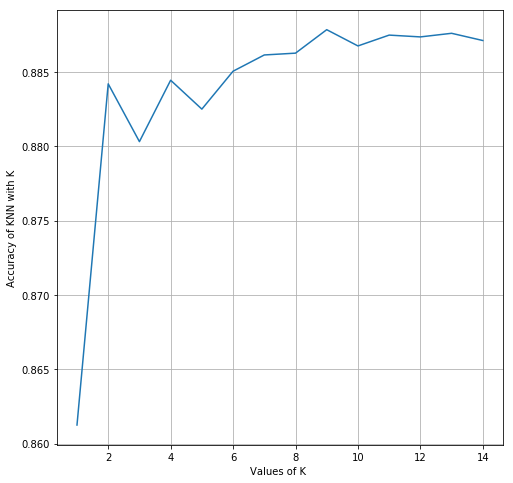

In [400]:
plt.figure(figsize=(8,8))
plt.plot(k_values,score_list)
plt.xlabel("Values of K ")
plt.ylabel("Accuracy of KNN with K")
plt.grid()

#the model fits well with the KNN